<a href="https://colab.research.google.com/github/zain4cs/Data_Visualization/blob/main/Plotly_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/diamonds.csv")
print(df.shape)
df = df.sample(frac=0.1, random_state=10) # 10% of Data
print(df.shape)

(53940, 11)
(5394, 11)


In [ ]:
df.head()

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
8018         8019   1.01    Premium     E     SI1   61.7   56.0   4330  6.44   
1583         1584   0.70  Very Good     D     VS1   60.4   58.0   3008  5.71   
9138         9139   1.13  Very Good     H     SI2   59.8   59.0   4537  6.75   
2787         2788   0.76      Ideal     F     VS2   61.0   55.0   3257  5.89   
52429       52430   0.70    Premium     I    VVS1   61.2   59.0   2513  5.65   

          y     z  
8018   6.39  3.96  
1583   5.78  3.47  
9138   6.82  4.06  
2787   5.92  3.60  
52429  5.69  3.47

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0        8019   1.01    Premium     E     SI1   61.7   56.0   4330  6.44   
1        1584   0.70  Very Good     D     VS1   60.4   58.0   3008  5.71   
2        9139   1.13  Very Good     H     SI2   59.8   59.0   4537  6.75   
3        2788   0.76      Ideal     F     VS2   61.0   55.0   3257  5.89   
4       52430   0.70    Premium     I    VVS1   61.2   59.0   2513  5.65   

      y     z  
0  6.39  3.96  
1  5.78  3.47  
2  6.82  4.06  
3  5.92  3.60  
4  5.69  3.47

In [ ]:
fig = px.scatter(df, x='carat', y='price', color='cut') # if use sns then write hue='cut'. Plotly use color='cut'
fig.show()

In [ ]:
fig = px.scatter(df, x='carat', y='price', color='cut',
                 title='Diamond Price vs Carat',
                 labels ={'carat': 'Carat Weight', 'price': 'Price ($)'}
                 )
fig.show()

In [ ]:
fig = px.line(df, x='carat', y='price',
                 title='Diamond Price vs Carat',
                 labels ={'carat': 'Carat Weight', 'price': 'Price ($)'}
                 )
fig.show()

In [ ]:
df_mean = df.groupby('carat')['price'].mean().reset_index()
fig = px.line(df_mean, x='carat', y='price',
              title='Mean Price By Carat'
              )
fig.show()

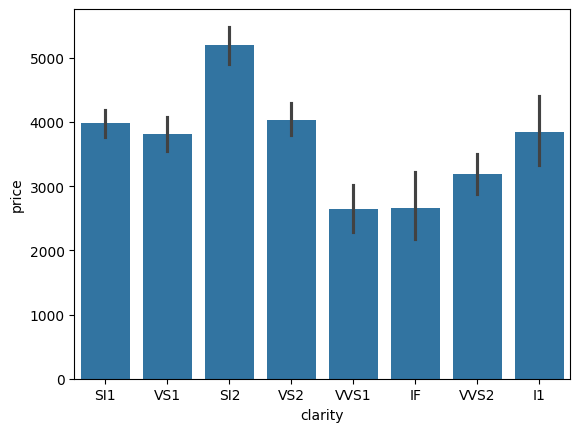

In [ ]:
sns.barplot(x='clarity', y='price', data=df)
plt.show()

In [ ]:
fig = px.bar(df, x='cut', y='price', color='cut')
fig.show()

**Apply Aggregation Function**

In [ ]:
df_stats = df.groupby('cut')['price'].agg(['mean','std']).reset_index()
df_stats.head()

fig = px.bar(df_stats, x='cut', y='mean', error_y='std',
             title='Average Price by Cut',
             color='cut'
             )
fig.show()

In [ ]:
# Histogram
fig = px.histogram(df, x='price', nbins=90, title='Price Distribution')
fig.show()

In [ ]:
# Histogram
fig = px.histogram(df, x='price', nbins=90, title='Price Distribution', color='cut')
fig.show()

In [ ]:
# Density Plot
fig = px.density_contour(df, x='carat', y='price',
                         title='Diamond Price vs Carat'
                         )
fig.show()

In [ ]:
fig = px.box(df, x='cut', y='price')
fig.show()

In [ ]:
fig = px.box(df, x='cut', y='price', color='cut',
            #  Outliers
             points= 'all',  # outlier, suspectedoutliers, all
             labels={'price': 'Price ($)', 'cut': 'CUT', 'clarity': 'Clarity'}
             )
fig.show()

In [ ]:
# Violin Plot
fig = px.violin(df, x='cut', y='price', color='cut')
fig.show()

**# Facet Scatter plot**

In [ ]:
fig = px.scatter(df, x='carat', y='price',
                 color='cut',
                 facet_col='clarity',
                 size='price',
                 animation_frame='cut',
                 title='Diamond Price vs Carat by cut and clarity'
                 )
fig.show()

In [ ]:
fig = px.density_heatmap(df, x='carat', y='price',
                         title='Carat Vs Price',

                         )
fig.show()

**Subplots**

In [ ]:
from plotly.subplots import make_subplots

# create subplot
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Carate Vs Price', 'Density Heatmap of Caratx   Vs Pirce'))

# Scatter Plot Carate Vs Price
scatter = px.scatter(df, x='carat', y ='price').data[0]
fig.add_trace(scatter, row=1, col=1)

# Density Heatmap of Caratx   Vs Pirce

heatmap = px.density_heatmap(df, x='carat', y='price').data[0]
fig.add_trace(heatmap, row=1, col=2)

fig.update_layout(title_text='Carat Vs Price & Density Heatmap of Carat Vs Price')
fig.show()

In [ ]:
# Craete Heatmap of correlation matrix only Numeric columns

corr  = df[['carat', 'depth', 'table', 'price','x','y','z']].corr()
# fig = px.density_heatmap(corr, text_auto=True)

fig = go.Figure(data=go.Heatmap(x=corr.index.values, y=corr.columns.values, z=corr.values, colorscale='Picnic'))
fig.show()

__________________________________

**3D Plots**

In [ ]:
fig = px.scatter_3d(df, x='carat', y='depth', z='price',
                    color='cut',
                    title='3D scatter plot carat, depth and price'
                    )
fig.show()

In [ ]:
fig = px.scatter_3d(df, x='carat', y='depth', z='cut',
                    color='price',
                    title='3D scatter plot carat, depth and price'
                    )
fig.show()

In [ ]:
fig = px.scatter(df,
                 x='carat',
                 y='price',
                size='price',
                 color='cut',
                title='Bubble chart'
                 )
fig.show()

In [ ]:
df_sorted = df.sort_values(by='carat')
fig= px.area(df_sorted,
             x='carat',
             y='price',
             color='cut',
             title='Cumulative Price by Carat'
             )
fig.show()

In [ ]:
# Pie Chart
fig = px.pie(df, names='clarity',
             color_discrete_sequence= px.colors.sequential.RdBu,
             title='Pie Chart')
fig.show()